author: Xumin Shen

uni: xs2484

collaborator: Crystal Shin

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import anndata
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import tarfile
import seaborn as sns
import scvi
import torch

from collections import OrderedDict
import pickle
#import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import array
import pandas as pd 
from sklearn.cluster import KMeans
from scipy.io import mmread
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
import umap
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import kneighbors_graph

C:\Users\xumin\anaconda3\lib\site-packages\scvi\__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


In [61]:
pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.2.0
adjustText                    0.7.3
aimodelshare                  0.0.142
aiohttp                       3.8.1
aiosignal                     1.2.0
airr                          1.4.1
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anndata                       0.8.0
anndata2ri                    1.1
annoy                         1.17.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Auto

pexpect                       4.8.0
pickleshare                   0.7.5
Pillow                        9.0.1
pip                           21.2.4
pkginfo                       1.8.2
plotly                        5.6.0
pluggy                        1.0.0
poyo                          0.5.0
proglog                       0.1.10
prometheus-client             0.13.1
promise                       2.3
prompt-toolkit                3.0.20
Protego                       0.1.16
protobuf                      3.19.1
psutil                        5.9.4
ptyprocess                    0.7.0
pure-eval                     0.2.2
py                            1.11.0
pyasn1                        0.4.8
pyasn1-modules                0.2.8
pycairo                       1.21.0
pycodestyle                   2.7.0
pycosat                       0.6.3
pycparser                     2.21
pyct                          0.4.6
pycurl                        7.44.1
PyDispatcher                  2.0.5
pydocstyle            

load the data

In [2]:
data = pd.read_table(r"pbmc_6Kcells_500genes.txt",sep = "\t",header=0,index_col = 0)

In [3]:
data

,4,13,16,23,27,31,36,37,41,45,...,7926,8045,8062,8065,8155,8189,8227,8240,8273,8294
CELLID,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
AAMDC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAR2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX1,2,5,1,3,0,2,4,2,3,0,...,1,2,1,2,5,1,4,0,5,7
ZFAS1,0,3,1,4,2,2,1,3,1,1,...,2,0,0,1,3,1,1,2,2,1
ZFP36,2,1,2,1,3,0,5,1,0,3,...,1,0,1,0,1,0,1,0,0,2


Q1a

In [4]:
column_total_filtered = np.sum(data, axis = 0)
column_total_filtered.shape

(6825,)

In [5]:
column_total_filtered

4       2058
13      3684
16      4258
23      2711
27      2501
        ... 
8189    1555
8227    2127
8240    2743
8273    4327
8294    2683
Length: 6825, dtype: int64

In [6]:
median_library_size = np.median(column_total_filtered)
median_library_size

2810.0

In [7]:
scaling_factor = column_total_filtered/median_library_size
normalized_data = data/scaling_factor
normalized_data.shape

(500, 6825)

In [8]:
normalized_data

,4,13,16,23,27,31,36,37,41,45,...,7926,8045,8062,8065,8155,8189,8227,8240,8273,8294
CELLID,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.807074,0.000000,0.000000,2.597643,0.000000
A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,1.050467,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.597643,0.000000
AAMDC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAR2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.083269,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX1,2.730807,3.813789,0.659934,3.109554,0.000000,2.100935,4.889082,1.837802,3.652513,0.000000,...,2.008578,2.512293,2.353434,3.003741,5.416345,1.807074,5.284438,0.000000,3.247053,7.331346
ZFAS1,0.000000,2.288274,0.659934,4.146072,2.247101,2.100935,1.222271,2.756704,1.217504,1.032329,...,4.017155,0.000000,0.000000,1.501871,3.249807,1.807074,1.321110,2.048852,1.298821,1.047335
ZFP36,2.730807,0.762758,1.319868,1.036518,3.370652,0.000000,6.111353,0.918901,0.000000,3.096988,...,2.008578,0.000000,2.353434,0.000000,1.083269,0.000000,1.321110,0.000000,0.000000,2.094670


In [9]:
log_normalized_data = np.log1p(normalized_data)

In [10]:
log_normalized_data

,4,13,16,23,27,31,36,37,41,45,...,7926,8045,8062,8065,8155,8189,8227,8240,8273,8294
CELLID,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.032143,0.000000,0.000000,1.280279,0.000000
A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.718068,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.280279,0.000000
AAMDC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAR2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.733938,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX1,1.316624,1.571485,0.506778,1.413314,0.000000,1.131704,1.773100,1.043030,1.537408,0.000000,...,1.101467,1.256269,1.209985,1.387229,1.858849,1.032143,1.838076,0.000000,1.446225,2.120025
ZFAS1,0.000000,1.190363,0.506778,1.638234,1.177763,1.131704,0.798529,1.323542,0.796382,0.709183,...,1.612863,0.000000,0.000000,0.917039,1.446874,1.032143,0.842045,1.114765,0.832397,0.716539
ZFP36,1.316624,0.566880,0.841510,0.711241,1.474912,0.000000,1.961692,0.651753,0.000000,1.410252,...,1.101467,0.000000,1.209985,0.000000,0.733938,0.000000,0.842045,0.000000,0.000000,1.129681


In [11]:
adata = ad.AnnData(log_normalized_data.T)

C:\Users\xumin\AppData\Local\Temp\ipykernel_42680\1444698484.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(log_normalized_data.T)


In [12]:
adata.obs['cellid'] = data.columns

In [13]:
adata.var['gene_name'] = data.index

In [15]:
adata

AnnData object with n_obs × n_vars = 6825 × 500
    obs: 'cellid'
    var: 'gene_name'

In [16]:
sc.tl.tsne(adata,n_pcs=20)

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\xumin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


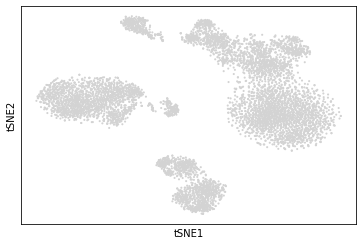

In [17]:
sc.pl.tsne(adata)

C:\Users\xumin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

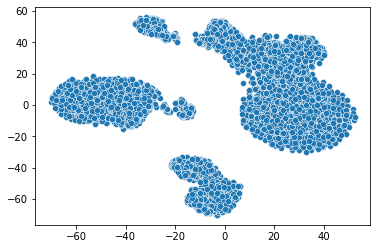

In [18]:
sns.scatterplot(adata.obsm['X_tsne'][:,0],  adata.obsm['X_tsne'][:,1])

Q1b

In [19]:
sc.tl.pca(adata, svd_solver='arpack',n_comps =50)

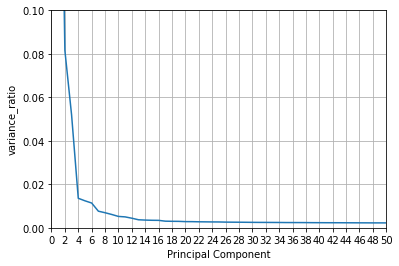

In [20]:
plt.plot(np.arange(50)+1,adata.uns['pca']['variance_ratio'])
plt.xlabel('Principal Component')
plt.ylabel('variance_ratio')
plt.xlim(right=50,left =0)
plt.ylim([0,0.1])
plt.xticks(np.arange(0,52,2))
plt.grid()

20 is too large, most of the principle components are not so meaningful. From this elbow  plot, the inflection point occurs at 5. So, the top 5 pcs can best represent the data.

Because most of the data are 0, the variances of each pc are small.

Q2

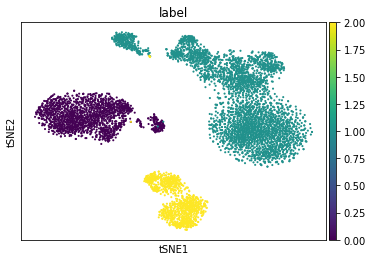

In [89]:
X = adata.X
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
adata.obs['label'] = labels
sc.pl.tsne(adata,color=['label'])

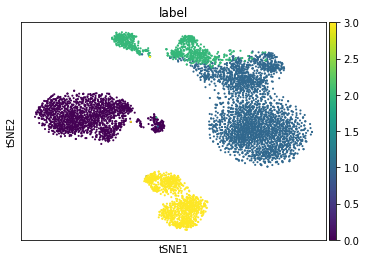

In [90]:
X = adata.X
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
adata.obs['label'] = labels
sc.pl.tsne(adata,color=['label'])

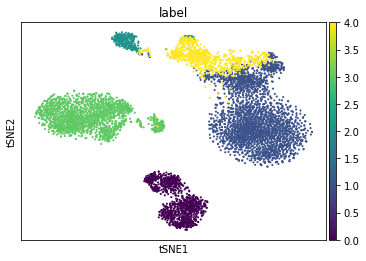

In [91]:
X = adata.X
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_
adata.obs['label'] = labels
sc.pl.tsne(adata,color=['label'])

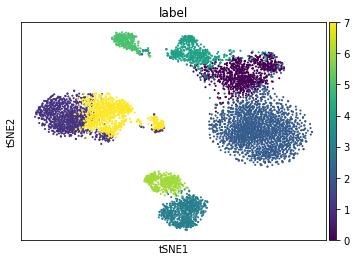

In [115]:
X = adata.X
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_
adata.obs['label'] = labels
sc.pl.tsne(adata,color=['label'])

Q3.

In [111]:
kng= kneighbors_graph(adata.X,30,mode='connectivity',metric='minkowski',include_self=True)
kng= kng.toarray()

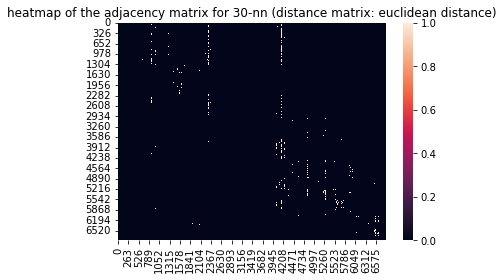

In [112]:
#fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(kng)
plt.title('heatmap of the adjacency matrix for 30-nn (distance matrix: euclidean distance)')
plt.show()

In [113]:
kng= kneighbors_graph(adata.X,30,mode='connectivity',metric ='correlation' ,include_self=True)
kng= kng.toarray()

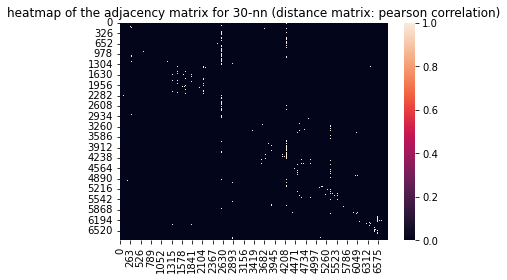

In [114]:
sns.heatmap(kng)
plt.title('heatmap of the adjacency matrix for 30-nn (distance matrix: pearson correlation)')
plt.show()

Here, I test the knn with two kinds of distance metrix. 

Scaling and changes in average expression level might affect Euclidean distance.

But correlation is not so sensitive. 

Q4

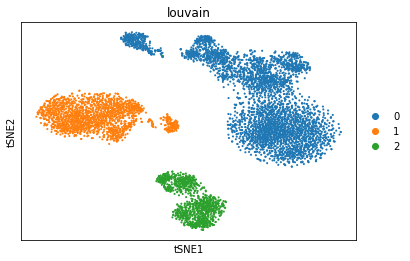

In [120]:
sc.tl.louvain(adata,resolution = 0.05)
sc.pl.tsne(adata,color=['louvain'])

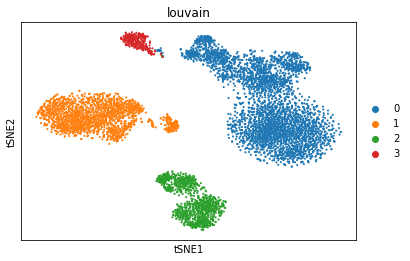

In [122]:
sc.tl.louvain(adata,resolution = 0.1)
sc.pl.tsne(adata,color=['louvain'])

Compared with k-means, louvain can better do the clustering, because it is a graph-based clustering algorithm

k-means is a centroid-based clustering algorithm. It finds the k cluster centroids, and then assigns each cell to the closest centroid. This makes some clusters occupy two clusters.

Q5a.

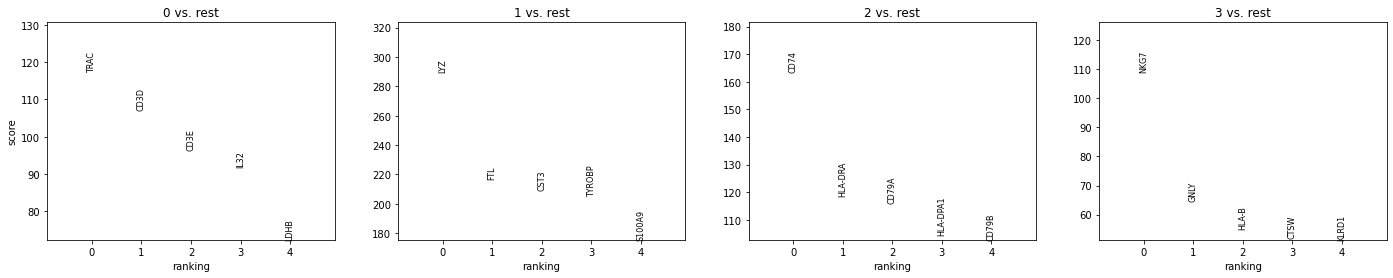

In [123]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

 - choose cluster 1 based on louvain

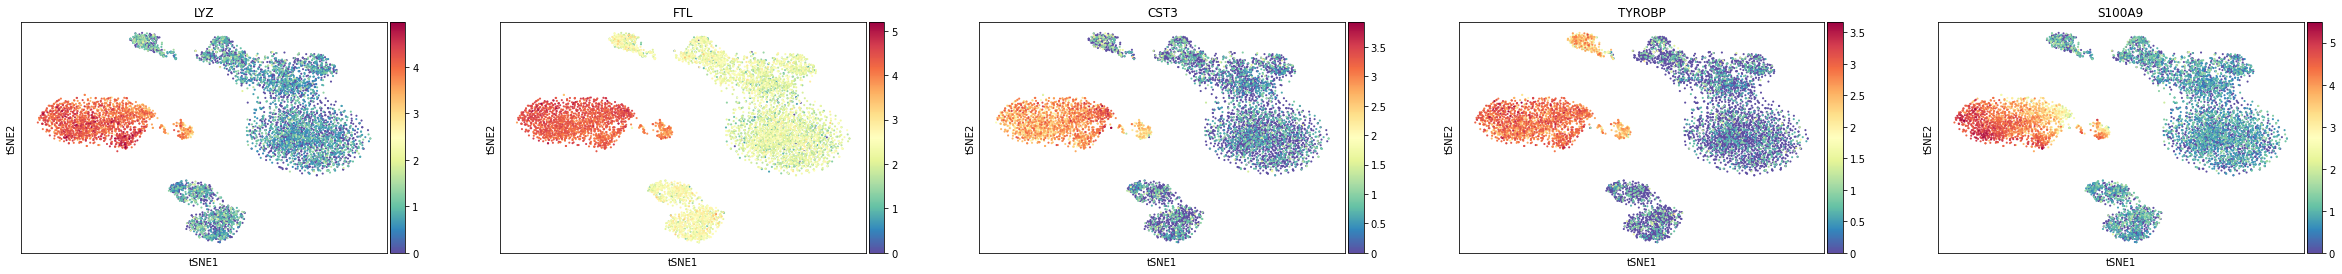

In [124]:
marker_genes = ['LYZ','FTL','CST3','TYROBP','S100A9']
sc.pl.scatter(adata,color=marker_genes,legend_loc='none',basis='tsne',color_map='Spectral_r') 

Q5b.

I would check the the top 5 differentially expressed genes, and compare them with major cell markers.


- cluster 0: TRAC, CD3D, CD3E, L32, LDHB. 

This cluster coule be T cell. TRAC, CD3D, CD3E comes from T cell.

- cluster 1: LYZ, FTL, CST3, TYROBP, S100A9



- cluster 2: CD74, HLA-DRA, CD79A, HLA-DPA1, CD79B


- cluster 3: NKG7, GNLY, HLA-B, CTSW, LRD1

This cluster coule be NK cells. NKG7,GNLY comes from NK cells.

Q5c.

using logistic regression method 

Here, a logistic regression model is trained to predict a gene comes from one group or the other. Then, choose the top 5 genes which belongs to a certain group.

C:\Users\xumin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


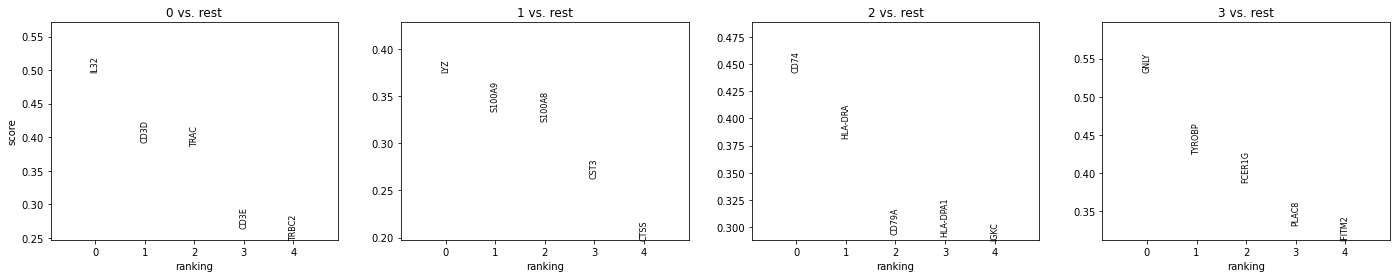

In [125]:
sc.tl.rank_genes_groups(adata, 'louvain', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

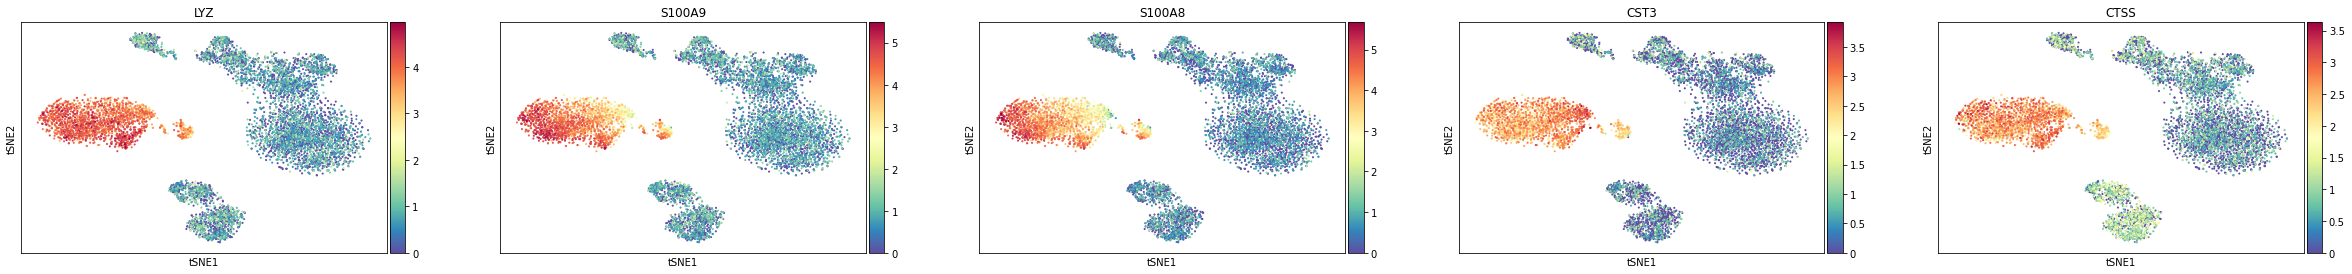

In [129]:
marker_genes = ['LYZ','S100A9','S100A8','CST3','CTSS']
sc.pl.scatter(adata,color=marker_genes,legend_loc='none',basis='tsne',color_map='Spectral_r') 

using Wilcoxon rank-sum method

There, wilcoxon rank-sum method is used to test if there is a significant difference between one cluster and the rest.

It rank the combined data set from both groups and compare the ranks of the observations in the two groups.

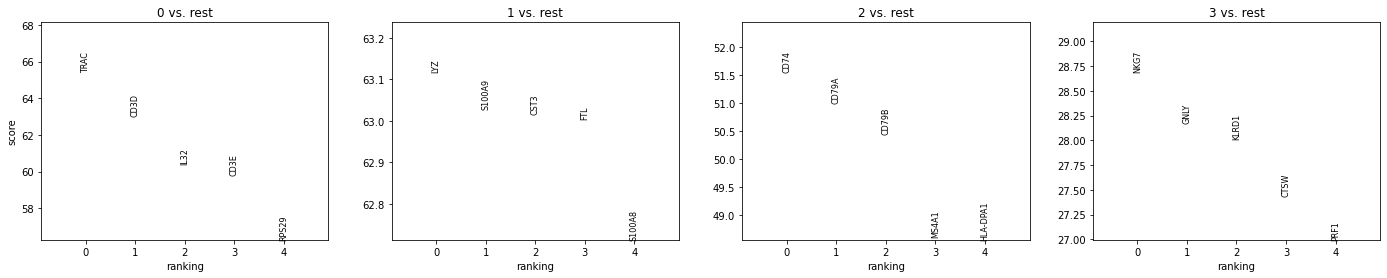

In [132]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

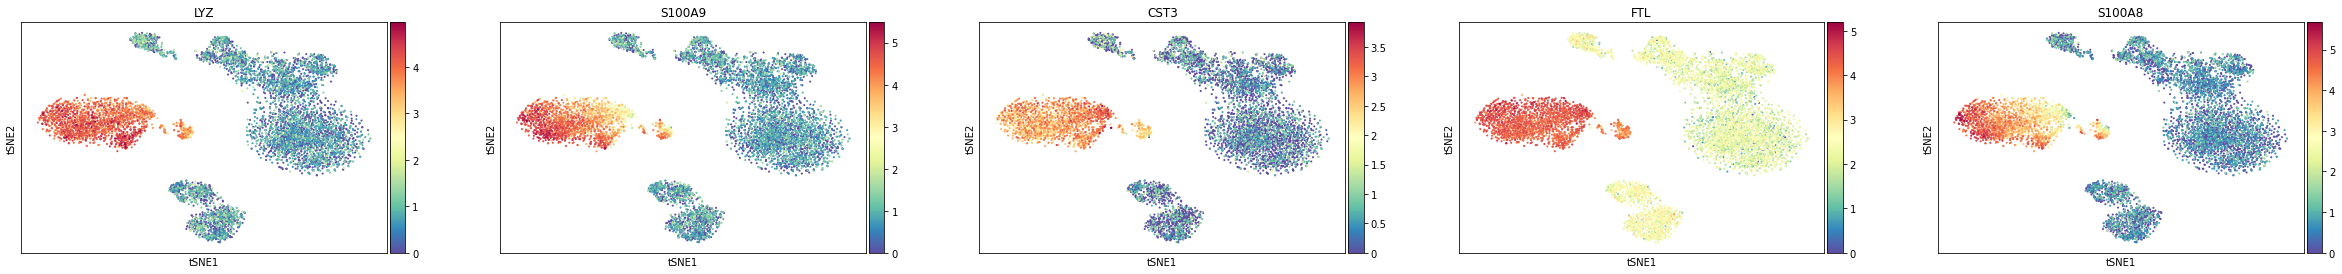

In [133]:
marker_genes = ['LYZ','S100A9','CST3','FTL','S100A8']
sc.pl.scatter(adata,color=marker_genes,legend_loc='none',basis='tsne',color_map='Spectral_r') 

Q6

According to Bayes' Theorem,$$ p(\theta|X)\propto p(X|\theta)p(\theta) $$

log lilelihood function:$$ ln(p(\theta|X)=ln(\sum_z{p(X,z|\theta)}))$$

Therefore,
$$ln(p(\theta|X)) \propto ln(\sum_z{p(X,z|\theta)}))+ln(p(\theta))=ln(\sum_z{p(X,z|\theta)})p(\theta))$$

For EM-step,

$$\theta'(\theta,\theta^{old}) = \sum_zp(z|X,\theta^{old})ln[p(X,z|\theta)p(\theta)]$$

$$=\sum_zp(z|X,\theta^{old})[ln(p(X,z|\theta))+ln(p(\theta))]$$

$$=\sum_zp(z|X,\theta^{old})ln(p(X,z|\theta))+ln(p(\theta))*\sum_zp(z|X,\theta^{old})$$

$$=\sum_zp(z|X,\theta^{old})ln(p(X,z|\theta))+ln(p(\theta))$$

$$=Q(\theta,\theta^{old})+ln(p(\theta)) $$